<a href="https://colab.research.google.com/github/DSpike/Iris_Plant_Classification/blob/main/Iris_Plant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#importing essential libraries (eg. Dataframe manipulation, N-Dimensial Array Manipulation,Data Preprocessing...)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing  import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
import time


In [2]:
#Mounting my google drive containing my dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading my Iris data set using panda library and specifing the column names that are going to be used
columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
df=pd.read_csv('/content/drive/My Drive/Iris.csv',header=0,names=columns )

In [ ]:
df.shape

(150, 5)

In [4]:
#preprocessing of the raw data:removing target feature
x=df.drop('Species',axis=1,inplace=False).values
y=df['Species'].values


In [5]:
#Label encoding of the target three features namely;Iris-setosa, Iris-versicolor,Iris-virginica
from sklearn.preprocessing import LabelEncoder
labelEndoder=LabelEncoder()
y_LabelEncoded=labelEndoder.fit_transform(y)

In [6]:
#splitting of our data using 80/20 rule(i.e, training data=80%, test data=10%,validation data=10% )
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test=train_test_split(x,y_LabelEncoded,test_size=0.2,stratify=y, random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_test,y_test,test_size=0.5, stratify=y_test, random_state=42)

In [7]:
#inorder the ensure standard distribution of feature data
sandardize=StandardScaler()
x_train=sandardize.fit_transform(x_train)
x_val=sandardize.transform(x_val)
x_test=sandardize.transform(x_test)


In [210]:
#building our deepnn model
model = keras.Sequential([
    layers.Dense(128,input_shape=(4,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Normalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 classes for the Iris dataset
])


In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

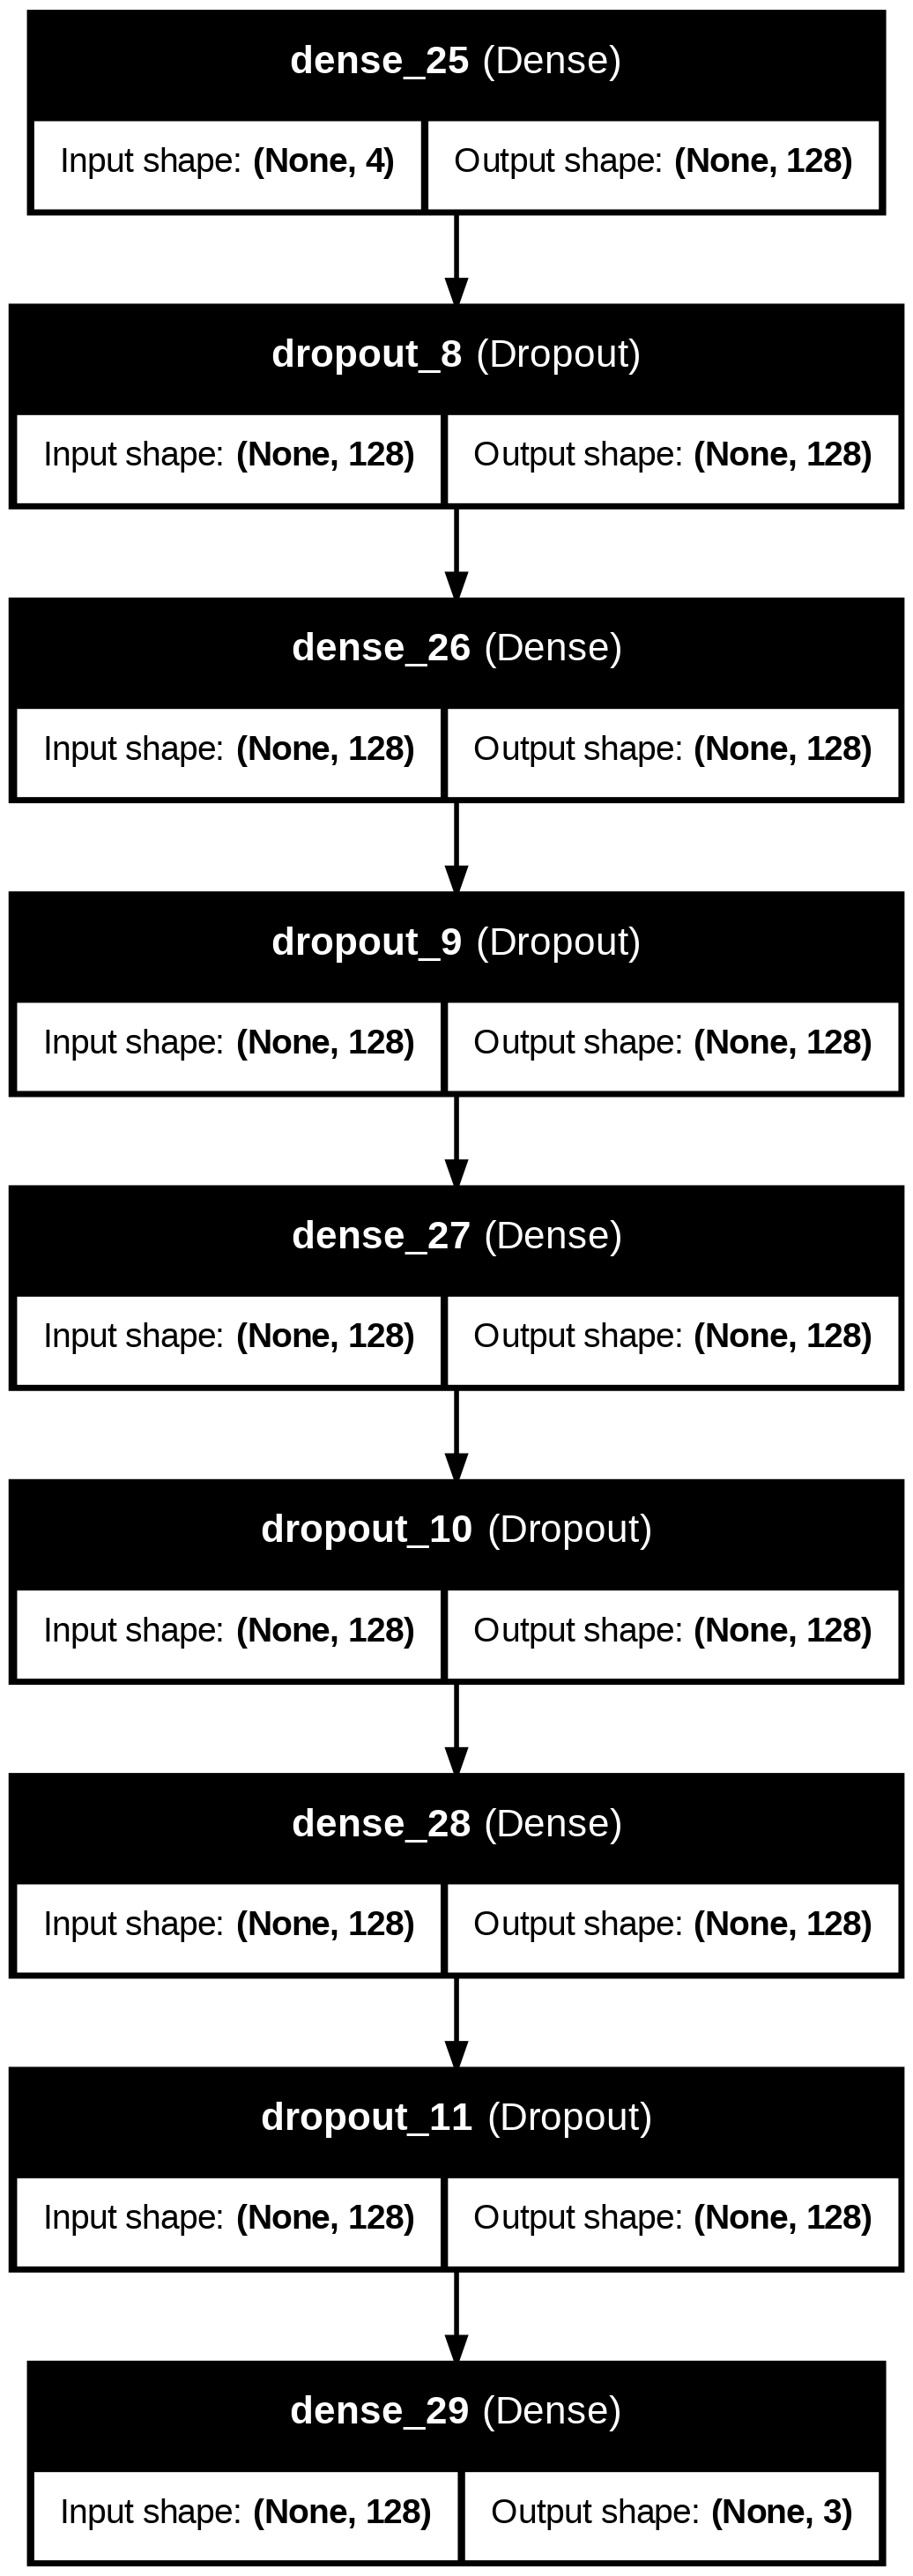

In [55]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [167]:
#optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [211]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [212]:
# Train the model
history=model.fit(x_train, y_train, epochs=280, batch_size=10, validation_data=(x_val, y_val))

Epoch 1/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3333 - loss: 5.0528 - val_accuracy: 0.4667 - val_loss: 4.9181
Epoch 2/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4778 - loss: 4.8775 - val_accuracy: 0.4667 - val_loss: 4.8167
Epoch 3/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3667 - loss: 4.9135 - val_accuracy: 0.4667 - val_loss: 4.7253
Epoch 4/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2444 - loss: 4.8395 - val_accuracy: 0.6667 - val_loss: 4.6426
Epoch 5/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3222 - loss: 4.7339 - val_accuracy: 0.6000 - val_loss: 4.5639
Epoch 6/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1667 - loss: 4.6530 - val_accuracy: 0.6000 - val_loss: 4.4900
Epoch 7/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4778 - loss: 4.4521 - val_accuracy: 0.6667 - val_loss: 4.4186
Epoch 8/280
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2000 - loss: 4.5422 - val_accuracy: 0.6667 - val_loss: 4

In [213]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score
test_loss, test_accuracy = model.evaluate(x_test, y_test)
#print('Accuracy: %3f': % accuracy_score(y_test, test_accuracy))
print(f'Test Accuracy: {test_accuracy:.3f}')
print(f'Test Loss: {test_loss:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.9667 - loss: 0.3968
Test Accuracy: 0.967
Test Loss: 0.397


In [214]:
# Make predictions

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report
# Compute evaluation metrics
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
roc_auc = roc_auc_score(pd.get_dummies(y_test), keras.utils.to_categorical(predicted_classes))

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {roc_auc:.4f}')

# Display detailed classification report
print("\nIris Leaf Data Classification HW Report:")
print(classification_report(y_test, predicted_classes, target_names=labelEndoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Precision: 0.9697
Recall: 0.9667
AUC: 0.9750

Iris Leaf Data Classification HW Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


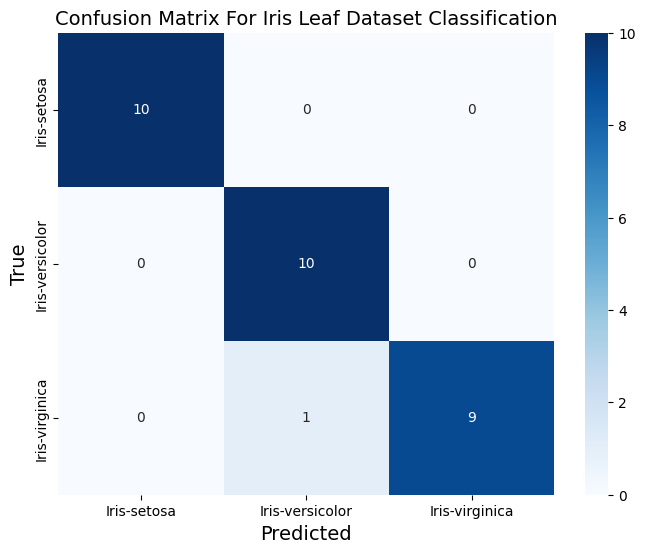

In [215]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confused_matrix = confusion_matrix(y_test, predicted_classes)
print(confused_matrix)
# Plot the confusion matrix
#plt.figure(figsize=(8, 6))
#sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=x, yticklabels=y)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix')
#plt.show()

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=labelEndoder.classes_, yticklabels=labelEndoder.classes_) # xticklabels and yticklabels can be added if needed
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('True',fontsize=14)
plt.title('Confusion Matrix For Iris Leaf Dataset Classification', fontsize=14)
plt.show()

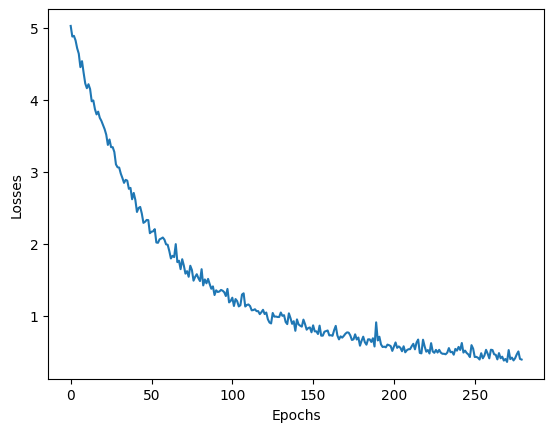

In [216]:
 Epochs =280
 losses = history.history['loss']
 plt. plot(range(Epochs),losses)
 plt.xlabel('Epochs')
 plt.ylabel('Losses')
 plt.show()

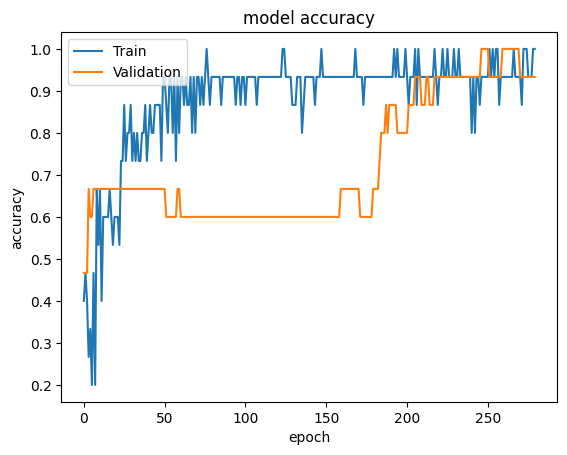

In [217]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

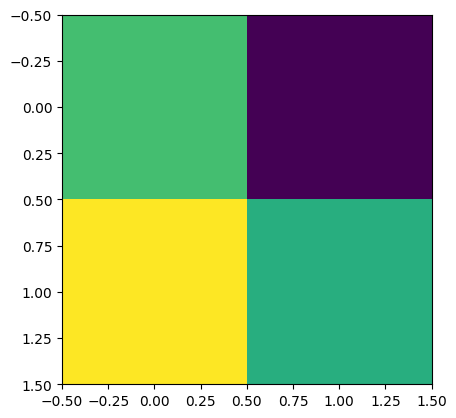

In [198]:
import random
n = random.randint(0, len(x_test) - 1) # Remove the comma to assign an integer to n
plt.imshow(x_test[n].reshape(2,2)) # Reshape the 1D array to a 2D array. You may need to adjust the dimensions based on your image
plt.show()


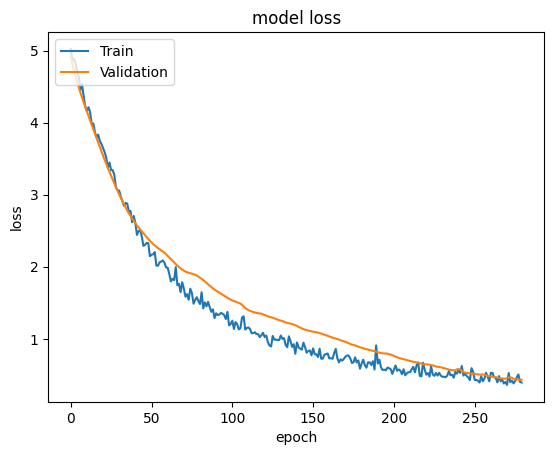

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

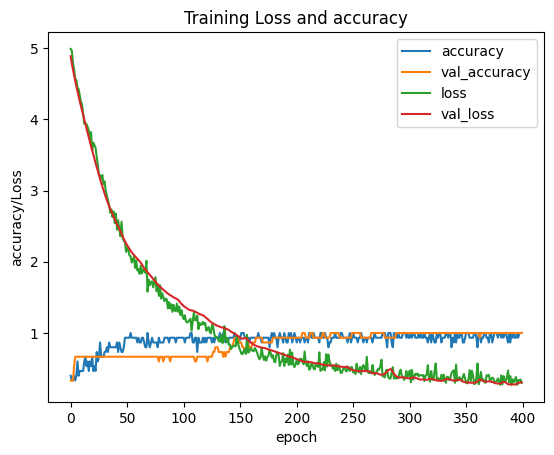

In [200]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()